This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant.

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [6]:
#importing our cancer dataset
dataset = pd.read_csv('data.csv')
print("This dataset is consisted of",dataset.shape)

dataset


This dataset is consisted of (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
# Eliminate NaN value column
dataset = dataset.iloc[:,:-1]
print("This dataset is consisted of",dataset.shape)

This dataset is consisted of (569, 32)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# dataset.drop('id',inplace  =True,axis = 1)


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

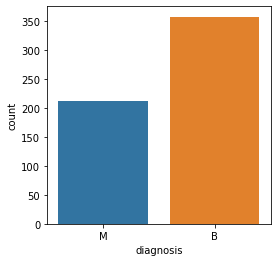

In [11]:
# Summary the Diagnosis
plt.figure(figsize=(4,4))
sns.countplot(data = dataset,x = 'diagnosis')


<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

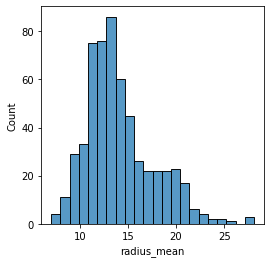

In [26]:
plt.figure(figsize=(4,4))
sns.histplot(data = dataset,x = 'radius_mean')

<AxesSubplot:xlabel='texture_mean'>

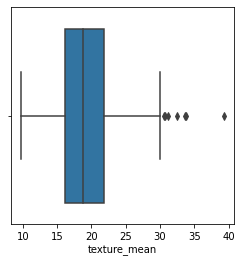

In [27]:
plt.figure(figsize=(4,4))
sns.boxplot(data = dataset,x = 'texture_mean')

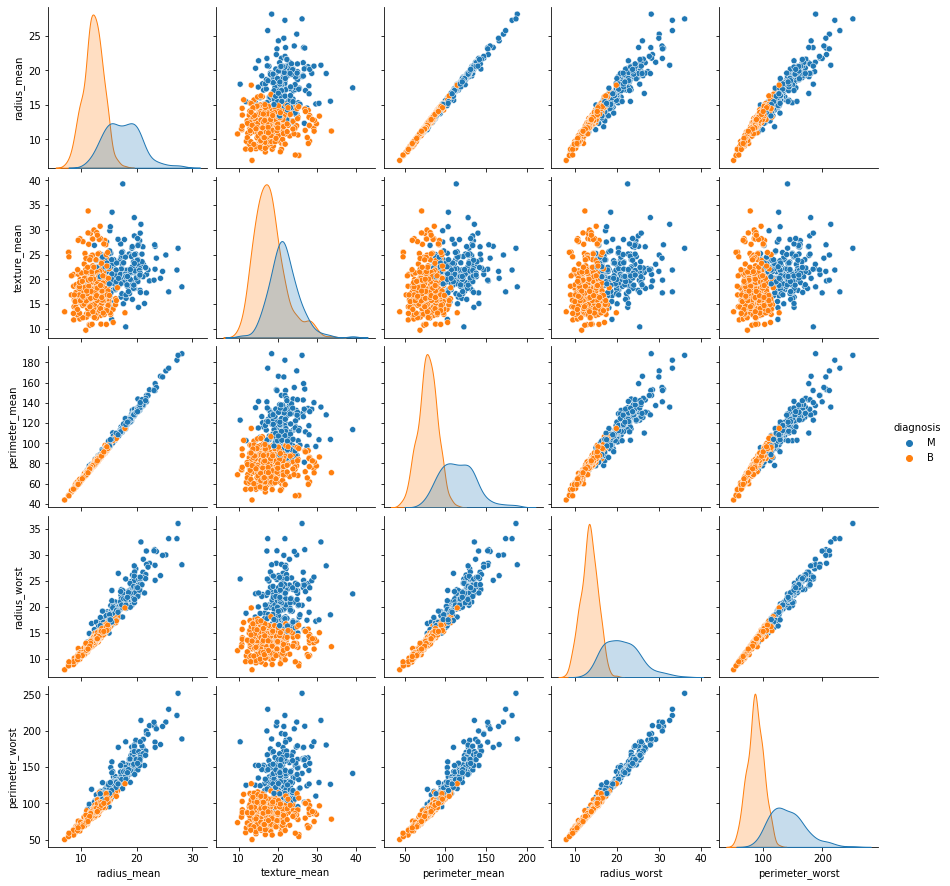

In [28]:
sns.pairplot(dataset, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()


Text(0.5, 1.05, 'Correlation of dataset Features')

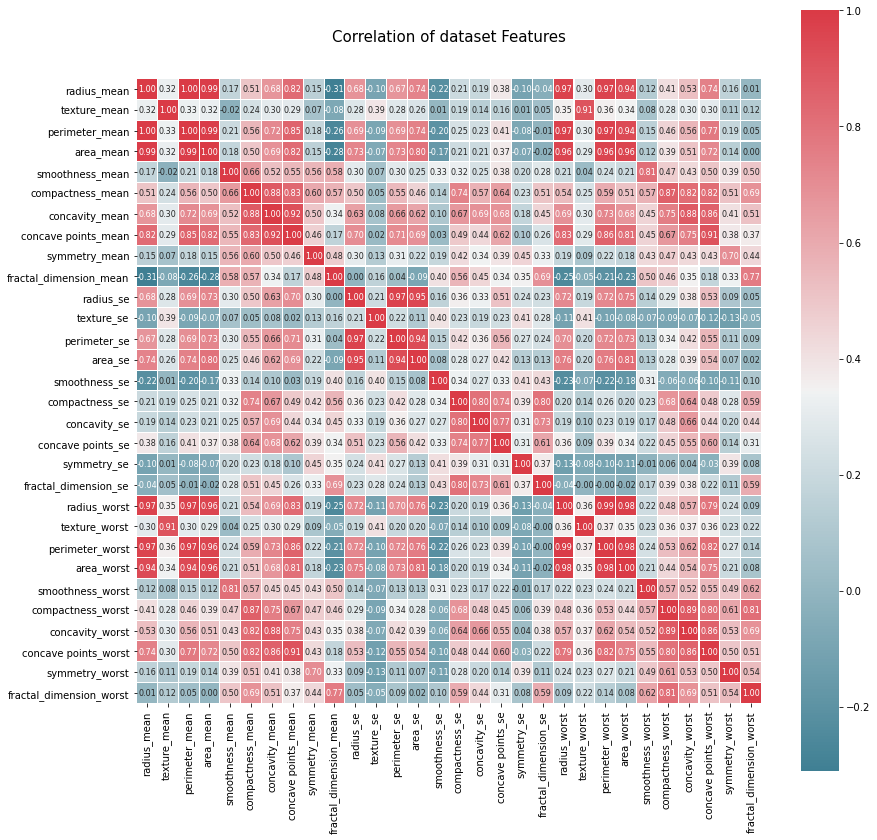

In [12]:
corr = dataset.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of dataset Features', y=1.05, size=15)

In [29]:
Diagnosis = pd.get_dummies(dataset['diagnosis'],drop_first=True)
dataset.drop(['diagnosis'],axis=1,inplace=True)
dataset = pd.concat([dataset,Diagnosis],axis=1)
dataset.rename(columns = {'M':'diagnosis'}, inplace = True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
dataset.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [33]:
X = dataset.drop(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst','fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'],axis=1)

y = dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [35]:
from sklearn.svm import SVC
model = SVC()

In [36]:
model.fit(X_train,y_train)

SVC()

In [37]:
pred = model.predict(X_test)


In [38]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred))
print('\n')



              precision    recall  f1-score   support

           0       0.86      0.97      0.91       105
           1       0.94      0.74      0.83        66

    accuracy                           0.88       171
   macro avg       0.90      0.86      0.87       171
weighted avg       0.89      0.88      0.88       171





In [39]:
print(confusion_matrix(y_test,pred))

[[102   3]
 [ 17  49]]


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'C':[0.1,1.1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}


In [42]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [43]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] .................. C=10, gamma=0.0001, score=0.924, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.873, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.637, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.637, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.625, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.646, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.646, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [44]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [45]:
grid.best_estimator_


SVC(C=1000, gamma=0.0001)

In [46]:
grid_predict = grid.predict(X_test)


In [47]:
print(classification_report(y_test,grid_predict))
print('\n')


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.97      0.98      0.98        66

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171





In [48]:
print(confusion_matrix(y_test,grid_predict))

[[103   2]
 [  1  65]]


In [49]:
log = round(grid.score(X,y)*100,2)
print(log)

99.3


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_predict)

0.9824561403508771